In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#setting up dataset

In [7]:
column_list=['user_id','item_id','rating','timestamp']

In [12]:
user_data=pd.read_csv('u.data',sep='\t',names=column_list)

In [13]:
user_data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [14]:
movie=pd.read_csv('Movie_Id_Titles')

In [15]:
movie.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [17]:
new_data=pd.merge(user_data,movie,on='item_id')

In [18]:
new_data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [19]:
#data modification,analysis and visualization of dataset

In [23]:
new_data.groupby('title')['rating'].mean().sort_values(ascending=False) #avg rating of movies

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [25]:
new_data.groupby('title')['rating'].count().sort_values(ascending=False) #count of ratings

title
Star Wars (1977)                              584
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [26]:
ratings=pd.DataFrame(new_data.groupby('title')['rating'].mean())

In [32]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [33]:
ratings['Number of Ratings']=new_data.groupby('title')['rating'].count()

In [34]:
ratings.head()

,rating,Number of Ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


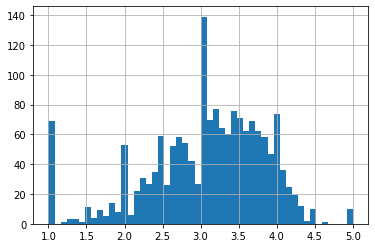

In [37]:
ratings['rating'].hist(bins=50)

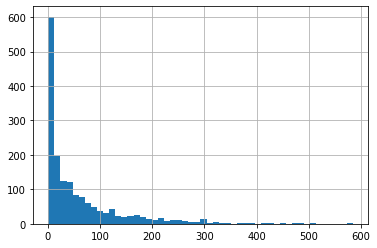

In [38]:
ratings['Number of Ratings'].hist(bins=50)

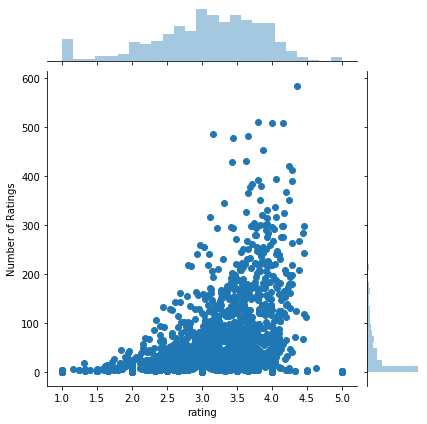

In [39]:
sns.jointplot(x='rating',y='Number of Ratings',data=ratings)

In [40]:
#creating recommender

In [42]:
new_data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [44]:
movie_mat=new_data.pivot_table(index='user_id',columns='title',values='rating')

In [46]:
movie_mat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
ratings.sort_values('Number of Ratings',ascending=False).head()

,rating,Number of Ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [50]:
#Now we will create the recommender of top most rated movies i.e for Star Wars and Contact

In [51]:
#Star Wars Recommender

In [52]:
star_wars_ratings=movie_mat['Star Wars (1977)']

In [56]:
star_wars_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [62]:
similar_to_star_wars=movie_mat.corrwith(star_wars_ratings)

In [63]:
similar_to_star_wars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [64]:
corr_starwars=pd.DataFrame(similar_to_star_wars,columns=['Correlation'])

In [68]:
corr_starwars.head().sort_values(by='Correlation',ascending=False)

,Correlation
title,
'Til There Was You (1997),0.872872
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
1-900 (1994),-0.645497


In [69]:
corr_starwars = corr_starwars.join(ratings['Number of Ratings'])

In [84]:
corr_starwars.head()

,Correlation,Number of Ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [ ]:
#Top 10 recommendations related to Star Wars

In [86]:
corr_starwars[corr_starwars['Number of Ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,Number of Ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [72]:
#Contact movie Recommender

In [73]:
contact_ratings=movie_mat['Contact (1997)']

In [75]:
contact_ratings.head()

user_id
0    NaN
1    5.0
2    3.0
3    2.0
4    5.0
Name: Contact (1997), dtype: float64

In [76]:
similar_to_contact=movie_mat.corrwith(contact_ratings)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [78]:
similar_to_contact.head()

title
'Til There Was You (1997)    0.904534
1-900 (1994)                      NaN
101 Dalmatians (1996)       -0.108441
12 Angry Men (1957)          0.022265
187 (1997)                   0.135512
dtype: float64

In [79]:
corr_contact=pd.DataFrame(similar_to_contact,columns=['Correlation'])

In [80]:
corr_contact.head()

,Correlation
title,
'Til There Was You (1997),0.904534
1-900 (1994),NaN
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512


In [81]:
corr_contact=corr_contact.join(ratings['Number of Ratings'])

In [83]:
corr_contact.head()

,Correlation,Number of Ratings
title,,
'Til There Was You (1997),0.904534,9
1-900 (1994),NaN,5
101 Dalmatians (1996),-0.108441,109
12 Angry Men (1957),0.022265,125
187 (1997),0.135512,41


In [85]:
#Top 10 recommendations related to Contact

In [87]:
corr_contact[corr_contact['Number of Ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,Number of Ratings
title,,
Contact (1997),1.000000,509
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136
Sneakers (1992),0.377275,150
"Firm, The (1993)",0.376987,151
Arsenic and Old Lace (1944),0.373759,115
Outbreak (1995),0.358015,104
